<a href="https://colab.research.google.com/github/diegolimaps/diegolimaps/blob/main/An%C3%A1lise_do_ISE_B3_Diego_Lima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [3]:
#Lendo os dados ISE baixados da B3.
scores = pd.read_excel('/content/drive/MyDrive/DCC/indices.xlsx', sheet_name = 'Scores 2021')

In [4]:
#Fazendo lista com os tickers das ações ISE 2022.
tickers_ise = ['AESB3.SA', 'AMBP3.SA', 'AMER3.SA', 'ARZZ3.SA', 'AZUL4.SA', 'BBAS3.SA',
              'BBDC4.SA', 'BEEF3.SA', 'BPAC11.SA', 'BRFS3.SA', 'BRKM5.SA', 'CCRO3.SA',
              'CIEL3.SA', 'CMIG4.SA', 'CPFE3.SA', 'CPLE6.SA', 'CSAN3.SA', 'DXCO3.SA',
              'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA', 'ENBR3.SA', 'FLRY3.SA', 'ITSA4.SA',
              'ITUB4.SA', 'KLBN11.SA', 'LIGT3.SA', 'LREN3.SA', 'MDIA3.SA', 'MGLU3.SA',
              'MOVI3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MYPK3.SA', 'NEOE3.SA', 'NTCO3.SA',
              'PCAR3.SA', 'RADL3.SA', 'RAIL3.SA', 'SANB11.SA', 'SIMH3.SA','SULA11.SA',
              'SUZB3.SA', 'TIMS3.SA', 'VBBR3.SA', 'VIIA3.SA', 'VIVT3.SA', 'WEGE3.SA']

In [5]:
#Baixando preço de fechamento de balcão das empresas que compõem o ISE 2022. 
papeis_ise = yf.download(tickers=tickers_ise, start='2022-1-1')['Adj Close']

[*********************100%***********************]  48 of 48 completed


In [6]:
#Ajustando o index do DF para o formato aaaa-mm-dd.
papeis_ise.dropna(inplace=True)
papeis_ise = papeis_ise.reset_index()
papeis_ise['Date'] = pd.to_datetime(papeis_ise['Date']).dt.date
papeis_ise['Date'] = pd.to_datetime(papeis_ise['Date'])
papeis_ise = papeis_ise.set_index('Date')

In [7]:
#Calculando a variação das ações no ano de 2022.
Variação = (papeis_ise.iloc[-1]/papeis_ise.iloc[0])-1
Variação = Variação.to_list()
scores['Variação'] = Variação

In [13]:
corr_dim = scores.drop(columns=['RANKING', 'SCORE ISE B3'])

In [8]:
import seaborn as sns

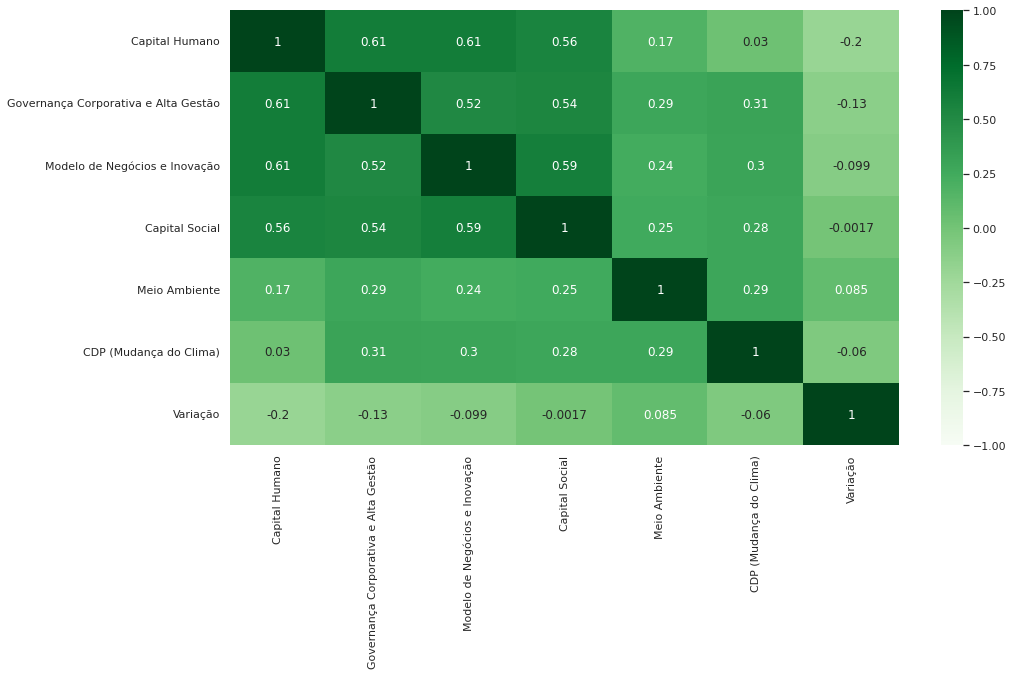

In [14]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_dim.corr(),vmin=-1, vmax=1, cmap="Greens", annot=True);

In [15]:
#Fazendo upload da série histórica do ISE desde 2006. Este índice não contém no YF portanto sendo necessário baixá-los no site de índices da B3.
isee = pd.read_excel('/content/drive/MyDrive/DCC/indices.xlsx', sheet_name='Evolucaoisee')

In [16]:
#Dropando dias que não possuem cotação (Fins de semana, feriados)
isee.dropna(inplace=True)

In [17]:
#Padronizando o index da tabela "Date"
isee['Date'] = pd.to_datetime(isee['Date'])
isee = isee.set_index('Date')

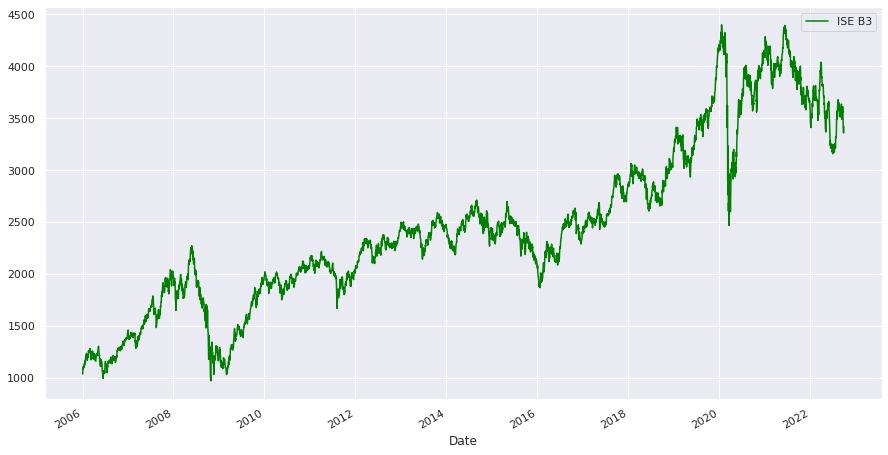

In [18]:
#Variação do ISE ao longo do ano.
isee.plot(color='green');

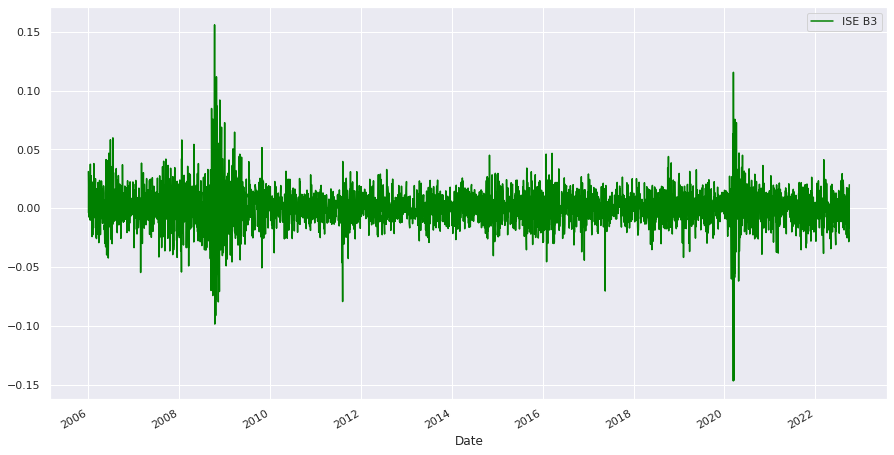

In [19]:
#Calculando e plotando a variação diária do ISE.
isee_retornos = isee.pct_change()
isee_retornos.plot(color='green');

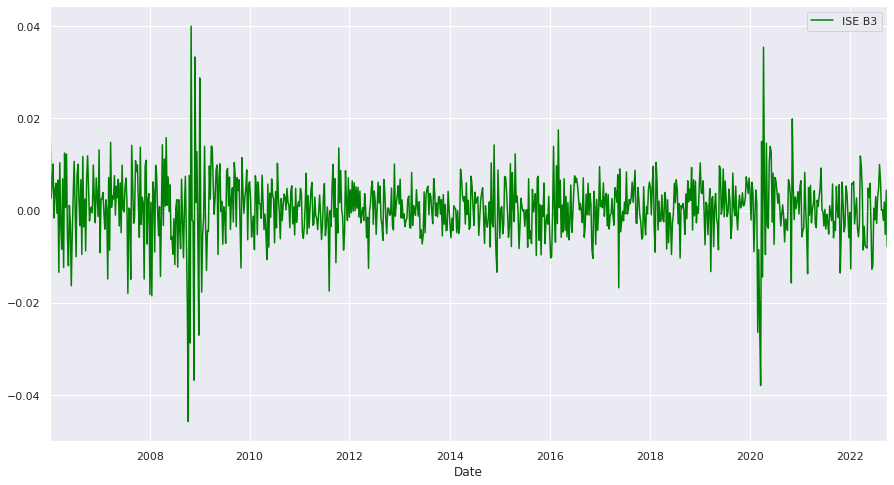

In [20]:
#Fazendo média semanal das variações. Outros períodos de tempo "Y = anual", "M = mensal".
isee_media_semanal = isee_retornos.resample('W').mean()
isee_media_semanal.plot(color='green');

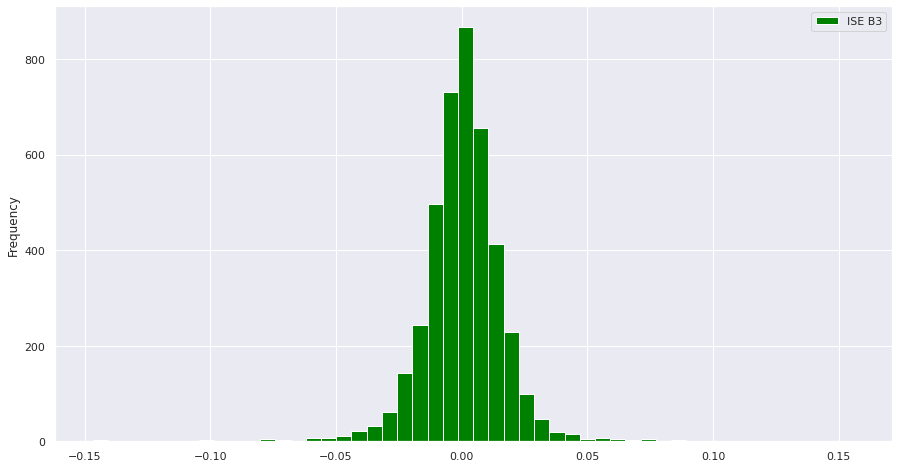

In [21]:
#Fazendo histograma das variações observadas ao longo dos anos.
isee_retornos.plot.hist(bins=50, color='green');

In [22]:
#Dados estatísticos das variações do ISE ao longo dos ano.
isee_retornos.describe()

,ISE B3
count,4142.000000
mean,0.000415
std,0.015955
min,-0.146743
25%,-0.007505
50%,0.000540
75%,0.008699
max,0.155970


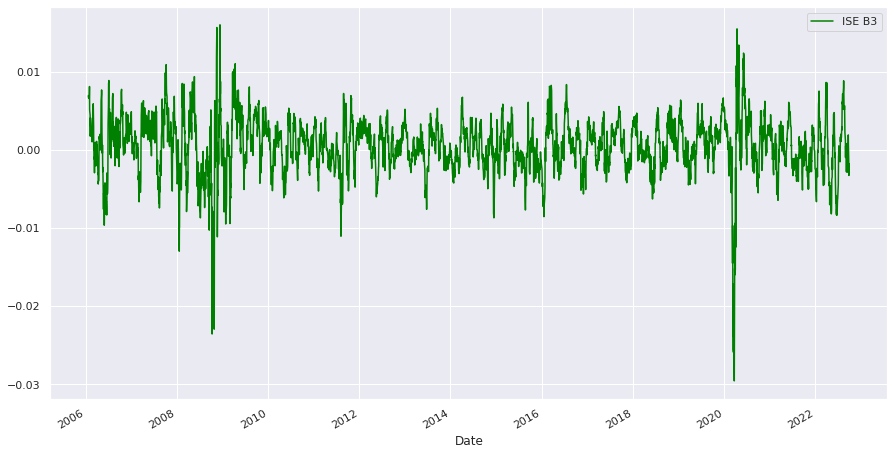

In [23]:
#Média móvel (15 dias) das variações do ISE ao longo dos anos.
media_movel_retornos_isee = isee_retornos.rolling(window=15).mean()
media_movel_retornos_isee.plot(color='green');

In [24]:
#Volatilidade
isee_retornos.std()

ISE B3    0.015955
dtype: float64

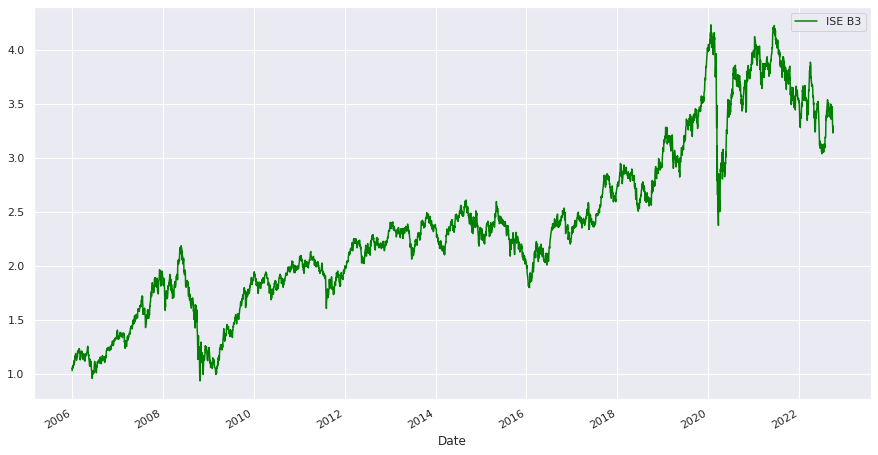

In [25]:
#Fazendo a normalização da ação
retorno_acm_isee = (1+isee_retornos).cumprod()
retorno_acm_isee.plot(color='green');

In [26]:
#Coletando a série histórica e fazendo a mesma modelagem para o índice Bovespa.
ibov = yf.download('^BVSP', start='2006-1-1')['Adj Close']
ibov = ibov.reset_index()
ibov['Date'] = pd.to_datetime(ibov['Date']).dt.date
ibov['Date'] = pd.to_datetime(ibov['Date'])
ibov = ibov.set_index('Date')
ibov = ibov.rename({'Adj Close':'IBOV'}, axis=1)
ibov_retornos = ibov.pct_change()
retorno_acm_ibov = (1+ibov_retornos).cumprod()

[*********************100%***********************]  1 of 1 completed


In [27]:
#Comparando os retornos oferecidos pelos índices ISE e BOVESPA desde 2006.
df_geral = pd.merge(retorno_acm_ibov, retorno_acm_isee, how='inner', on='Date')

In [28]:
import matplotlib.pyplot as plt

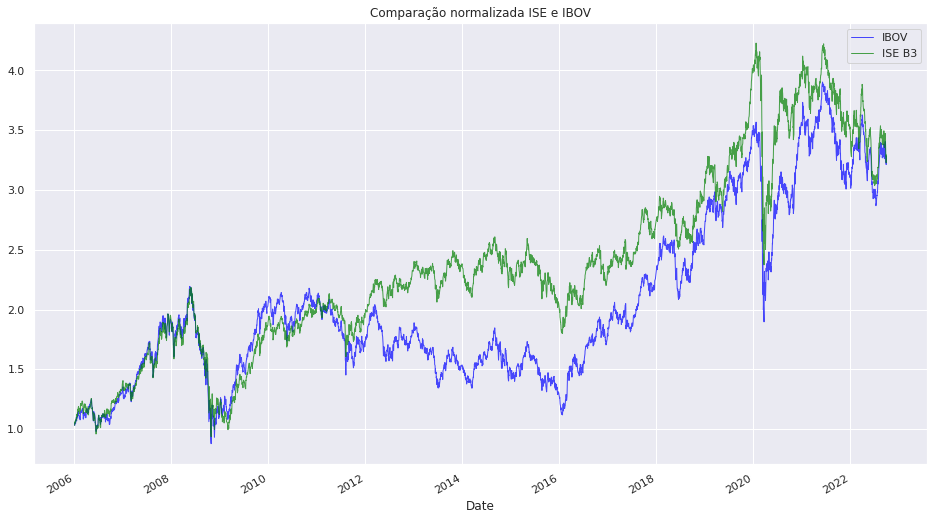

In [29]:
color=['blue','green']
df_geral[['IBOV', 'ISE B3']].plot(title = 'Comparação normalizada ISE e IBOV', lw = '1', color=color, alpha=0.7, figsize=(16,9));

In [ ]:
#Colentando dados fundamentalistas das empresas que compõem o ISE 2022 pelo YF. 
company_metrics = {}
for company in tickers_ise:
    company_metrics[company] = {}

    company_info = yf.Ticker(company)
    company_metrics[company]['Lucro por ação'] = company_info.info['trailingEps']
    company_metrics[company]['Retorno / Investimento'] = company_info.info['returnOnAssets']
    company_metrics[company]['Retorno / Ativos'] = company_info.info['returnOnEquity']
    company_metrics[company]['Margem de Lucro Líquido'] = company_info.info['profitMargins']
    company_metrics[company]['Margem de Lucro Operacional'] = company_info.info['operatingMargins']
df = pd.DataFrame.from_dict(company_metrics)

In [30]:
#Colentando dados fundamentalistas das empresas que compõem o ISE 2022 pelo YF salvos anteriormente.
df = pd.read_excel('/content/drive/MyDrive/DCC/indices.xlsx', sheet_name='Dados Fundamentalistas ISE 2022')

In [31]:
scoresvarfund = pd.concat([scores.reset_index(drop=True), df.reset_index(drop=True)],axis=1) 

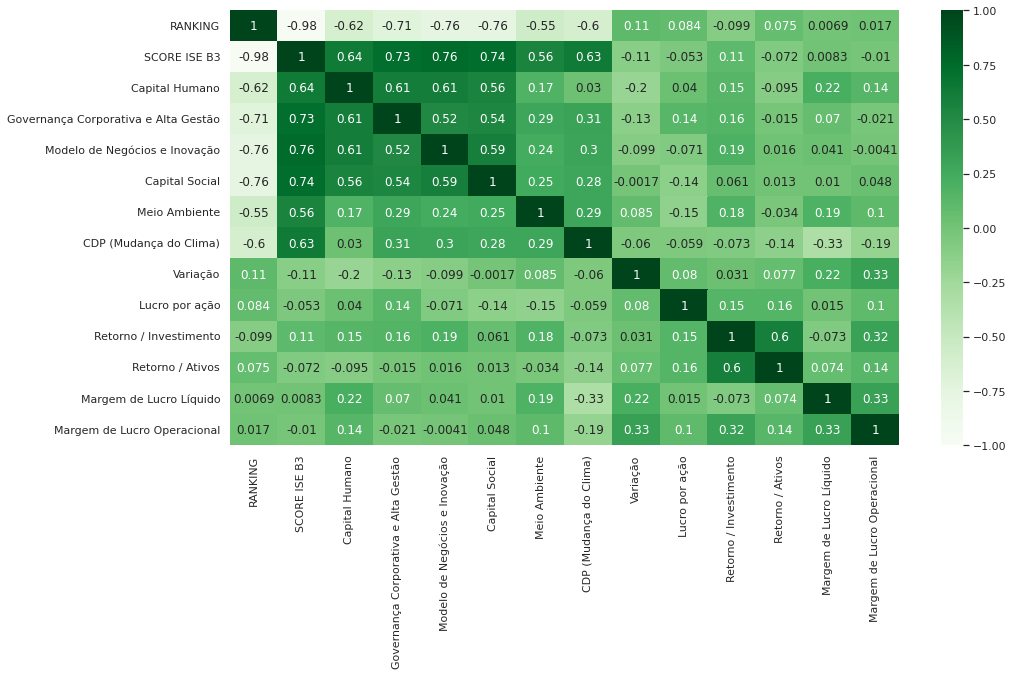

In [33]:
sns.heatmap(scoresvarfund.corr(),vmin=-1, vmax=1, cmap="Greens", annot=True);

In [34]:
import scipy.stats

(-0.05264460358890228, 0.7223162760811888)

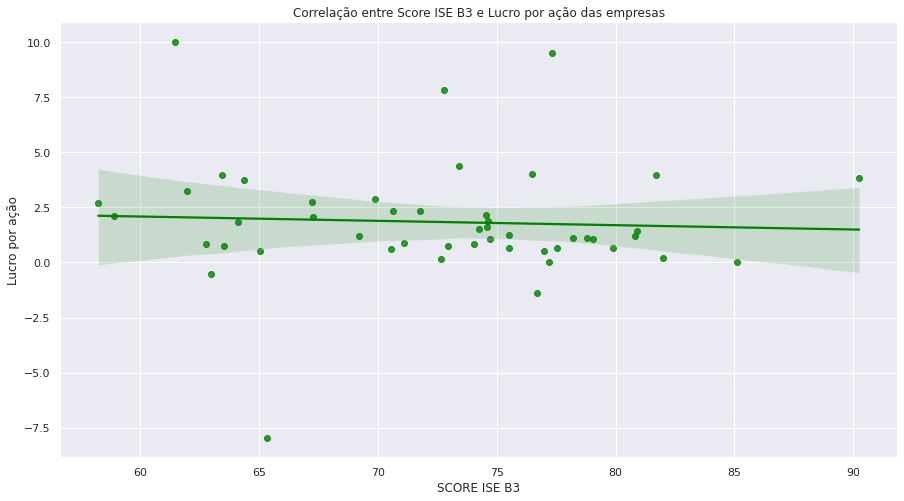

In [54]:
sns.regplot(x=scoresvarfund['SCORE ISE B3'], y=scoresvarfund['Lucro por ação'], scatter_kws={"color": "green"}, line_kws={"color": "green"}).set(title='Correlação entre Score ISE B3 e Lucro por ação das empresas');
scipy.stats.pearsonr(scoresvarfund['SCORE ISE B3'], scoresvarfund['Lucro por ação'])

(0.008285649809627722, 0.9554275161878112)

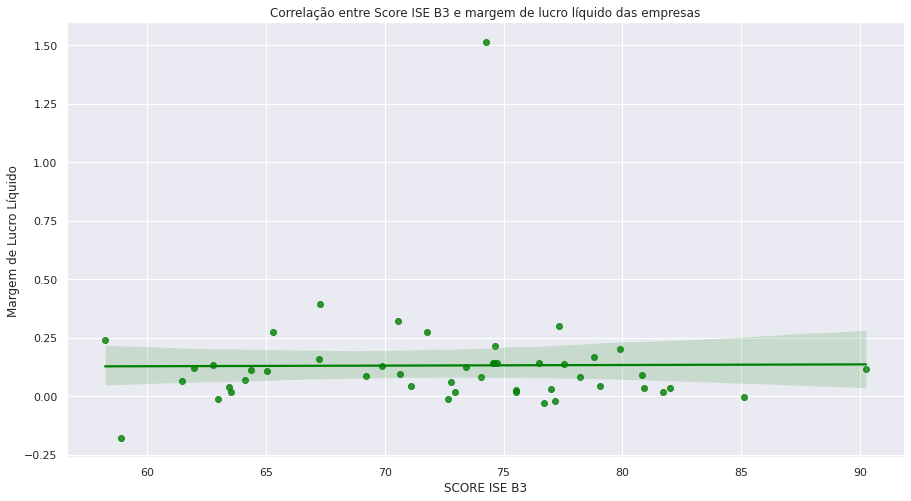

In [53]:
sns.regplot(x=scoresvarfund['SCORE ISE B3'], y=scoresvarfund['Margem de Lucro Líquido'], scatter_kws={"color": "green"}, line_kws={"color": "green"}).set(title='Correlação entre Score ISE B3 e margem de lucro líquido das empresas');
scipy.stats.pearsonr(scoresvarfund['SCORE ISE B3'], scoresvarfund['Margem de Lucro Líquido'])